Customer segmentation

You are the owner of a shop. It doesn't matter if you own an e-commerce or a supermarket. It doesn't matter if it is a small shop or a huge company such as Amazon or Netflix, it's better to know your customers.

You were able to collect basic data about your customers holding a membership card such as Customer ID, age, gender, annual income, and spending score. This last one is a score based on customer behavior and purchasing data. There are some new products on the market that you are interested in selling. But you want to target a specific type of clients for each one of the products.

Machine learning comes in handy for this task. Particularly, clustering, the most important unsupervised learning problem, is able to create categories grouping similar individuals. These categories are called clusters. A cluster is a collection of points in a dataset.

Importing the libraries and the data

In [41]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

Read data into a DataFrame
We read the basic data stored in the customers1.csv file into a DataFrame using pandas

In [2]:
customers1 = pd.read_csv("customers1.csv")

In [3]:
customers1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Finding the missing values from the data

In [4]:
print(f"Missing values in each variable: \n{customers1.isnull().sum()}")


Missing values in each variable: 
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Find Duplicate Rows from the data

In [5]:
print(f"Duplicated rows: {customers1.duplicated().sum()}")

Duplicated rows: 0


Finally, we check how each variable is presented in the DataFrame. Categorical variables cannot be handled directly. K-means is based on distances. The approach for converting those variables depend on the type of categorical variables.

In [6]:
print(f"Variable:                  Type: \n{customers1.dtypes}")

Variable:                  Type: 
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


Descriptive statistics and Distribution.

For the descriptive statistcs, we'll get mean, standard deviation, median and variance. If the variable is not numeric, we'll get the counts in each category.

In [7]:
def statistics(variable):
    if variable.dtype == "int64" or variable.dtype == "float64":
        return pd.DataFrame([[variable.name, np.mean(variable), np.std(variable), np.median(variable), np.var(variable)]], 
                            columns = ["Variable", "Mean", "Standard Deviation", "Median", "Variance"]).set_index("Variable")
    else:
        return pd.DataFrame(variable.value_counts())

In [8]:
def graph_histo(x):
    if x.dtype == "int64" or x.dtype == "float64":
        # Select size of bins by getting maximum and minimum and divide the substraction by 10
        size_bins = 10
        # Get the title by getting the name of the column
        title = x.name
        #Assign random colors to each graph
        color_kde = list(map(float, np.random.rand(3,)))
        color_bar = list(map(float, np.random.rand(3,)))

        # Plot the displot
        sns.distplot(x, bins=size_bins, kde_kws={"lw": 1.5, "alpha":0.8, "color":color_kde},
                       hist_kws={"linewidth": 1.5, "edgecolor": "grey",
                                "alpha": 0.4, "color":color_bar})
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.ylabel("Frequency", size=16, labelpad=15);
        # Customize title
        plt.title(title, size=18)
        # Customize grid and axes visibility
        plt.grid(False);
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);   
    else:
        x = pd.DataFrame(x)
        # Plot       
        sns.catplot(x=x.columns[0], kind="count", palette="spring", data=x)
        # Customize title
        title = x.columns[0]
        plt.title(title, size=18)
        # Customize ticks and labels
        plt.xticks(size=14)
        plt.yticks(size=14);
        plt.xlabel("")
        plt.ylabel("Counts", size=16, labelpad=15);        
        # Customize grid and axes visibility
        plt.gca().spines["top"].set_visible(False);
        plt.gca().spines["right"].set_visible(False);
        plt.gca().spines["bottom"].set_visible(False);
        plt.gca().spines["left"].set_visible(False);

We'll start by the Spending Score.

In [9]:
spending = customers1["Spending Score (1-100)"]

In [10]:
statistics(spending)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Spending Score (1-100),50.2,25.758882,50.0,663.52


F:\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


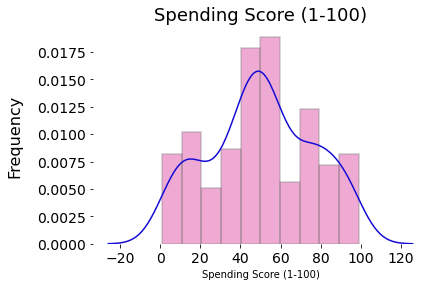

In [11]:
graph_histo(spending)

Then, we'll check Age.

In [12]:
age = customers1["Age"]

In [13]:
statistics(age)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Age,38.85,13.934041,36.0,194.1575


F:\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


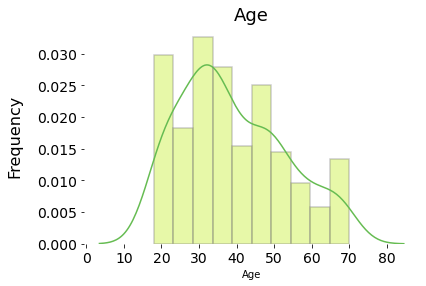

In [14]:
graph_histo(age)

Finally, we'll explore Annual Income variable.

In [15]:
income = customers1["Annual Income (k$)"]

In [16]:
statistics(income)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Annual Income (k$),60.56,26.198977,61.5,686.3864


F:\shiva\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


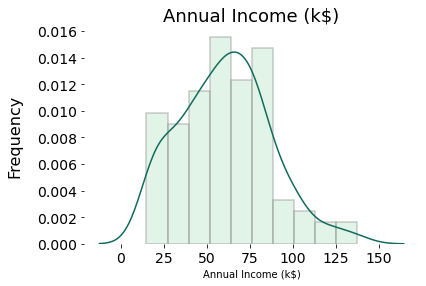

In [17]:
graph_histo(income)

In [18]:
gender = customers1["Gender"]

In [19]:
statistics(gender)

,Gender
Female,112
Male,88


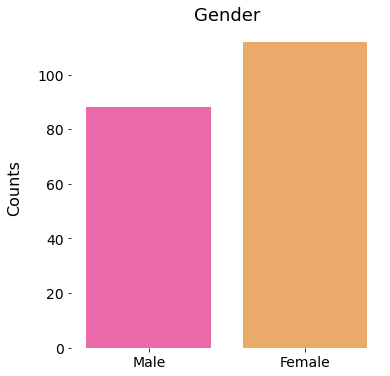

In [20]:
graph_histo(gender)

Correlation between parameteres

Also, we will analyze the correlation between the numeric parameters. For that aim, we'll use the pairplot seaborn function. We want to see whether there is a difference between gender. So, we are going to set the hue parameter to get different colors for points belonging to female or customers.

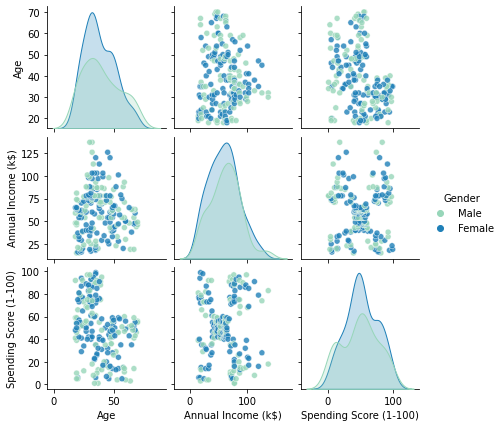

In [21]:
sns.pairplot(customers1, x_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               y_vars = ["Age", "Annual Income (k$)", "Spending Score (1-100)"], 
               hue = "Gender", 
               kind= "scatter",
               palette = "YlGnBu",
               height = 2,
               plot_kws={"s": 35, "alpha": 0.8});

Analyzing Data for Modelling

Analyzing Annual Income data First we look at the 'Annual Income' column.

Visualizing Annual Income per Age on a Scatterplot.

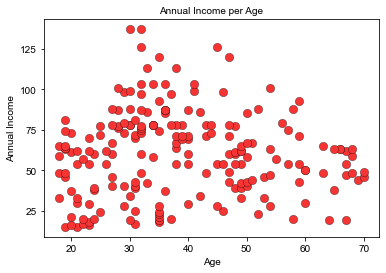

In [22]:
fig, ax = plt.subplots(figsize=(6,4))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=customers1['Annual Income (k$)'], x=customers1['Age'], color='#f73434', s=70,edgecolor='black', linewidth=0.3)
ax.set_ylabel('Annual Income')

plt.title('Annual Income per Age', fontsize = 10)
plt.show()

Visualizing difference of Annual Income between Male and Female Customers using Violin Plot.

Analyzing Spending Score data

Visualizing Spending Scores per Age on a scatterplot.

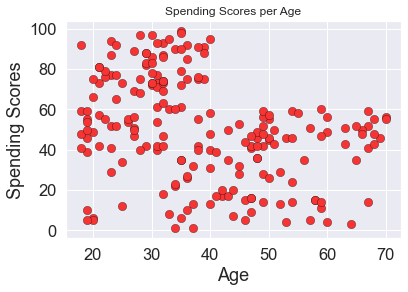

In [23]:
fig, ax = plt.subplots(figsize=(6,4))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=customers1['Spending Score (1-100)'], x=customers1['Age'], s=70, color='#f73434', edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Scores')

plt.title('Spending Scores per Age', fontsize = 12)
plt.show()

Visualizing difference of Annual Income,Spending score,Age between Male and Female Customers using Violin Plot.

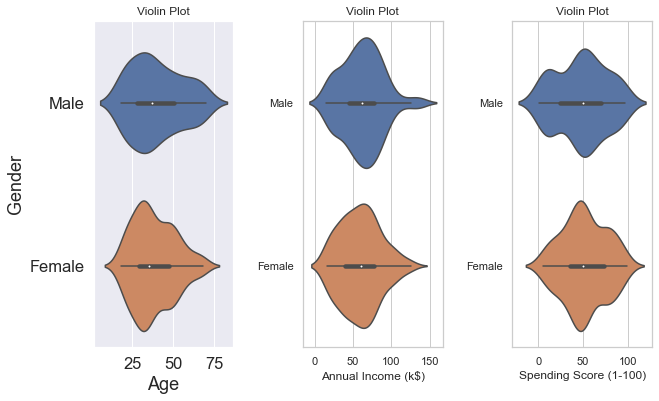

In [24]:
plt.figure(1,figsize=(10,6))
n=0
for cols in ['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace =0.5 , wspace=0.5)
    sns.violinplot(x= cols, y='Gender' , data =customers1)
    plt.ylabel('Gender'if n==1 else'')
    plt.title('Violin Plot')
plt.show() 

K-means clustering

K-means clustering is a clustering algorithm that aims to partition n observations into k clusters. Initialisation – K initial “means” (centroids) are generated at random Assignment – K clusters are created by associating each observation with the nearest centroid Update – The centroid of the clusters becomes the new mean, Assignment and Update are repeated iteratively until convergence The end result is that the sum of squared errors is minimised between points and their respective centroids. We will use KMeans Clustering.

Now we will build the model for creating clusters from the dataset. We will use n_clusters = 5 i.e. 5 clusters as we have determined by the elbow method, which would be optimal for our dataset.

Our data set is for unsupervised learning therefore we will use fit_predict() Suppose we were working with supervised learning data set we would use fit_tranform()

In [29]:
# Kmeans algorithm
# n_clusters: Number of clusters. In our case 5
# init: k-means++. Smart initialization
# max_iter: Maximum number of iterations of the k-means algorithm for a single run
# n_init: Number of time the k-means algorithm will be run with different centroid seeds. 
# random_state: Determines random number generation for centroid initialization.
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=0)

# Fit and predict 
y_means = kmeans.fit_predict(X2)

Now, let's check how our clusters look like:

In [30]:
customers1.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [31]:
customers1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [32]:
clustering_customers1= customers1.iloc[:,[3,4]]
clustering_customers1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


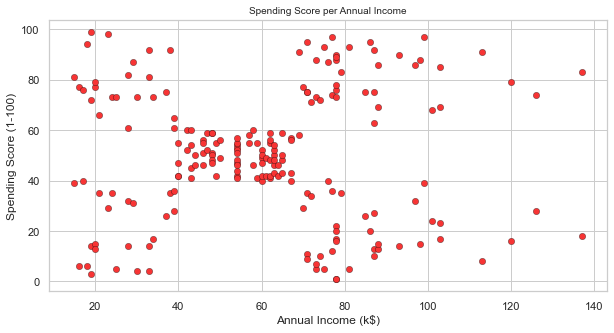

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
sns.set(font_scale=1.5)
ax = sns.scatterplot(y=clustering_customers1['Spending Score (1-100)'],x=clustering_customers1['Annual Income (k$)'], s=40, color='#f73434', edgecolor='black', linewidth=0.3)
ax.set_ylabel('Spending Score (1-100)')
ax.set_xlabel('Annual Income (k$)')
plt.title('Spending Score per Annual Income', fontsize = 10)
plt.show()

In [34]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,30):
    km = KMeans(i)
    km.fit(clustering_customers1)
    wcss.append(km.inertia_)
np.array(wcss)

array([269981.28      , 181363.5959596 , 106348.37306211,  73679.78903949,
        44448.45544793,  37239.83554246,  30566.45113025,  25022.48500453,
        21818.11458845,  19664.68519601,  17640.78026814,  15993.94226609,
        14409.42666778,  12854.73054224,  11659.36754079,  11172.71539119,
        10099.63211119,   9253.83915831,   8641.83530914,   8066.8578091 ,
         7558.36730112,   7218.06466114,   6795.402442  ,   6513.02307692,
         6098.57489229,   5839.96457238,   5588.91531049,   5270.56787043,
         4729.77965368])

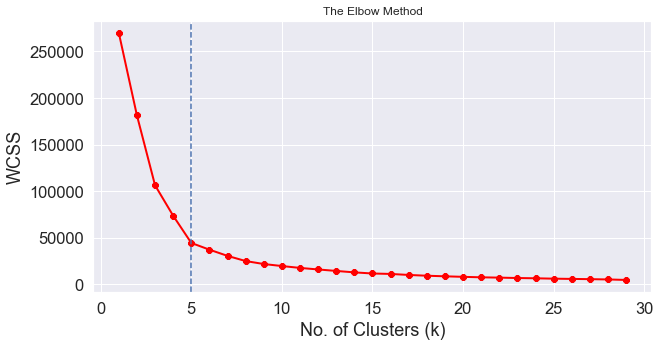

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
ax = plt.plot(range(1,30),wcss, linewidth=2, color="red", marker ="8")
plt.axvline(x=5, ls='--')
plt.ylabel('WCSS')
plt.xlabel('No. of Clusters (k)')
plt.title('The Elbow Method', fontsize = 12)
plt.show()

In [36]:
from sklearn.cluster import KMeans

kms = KMeans(n_clusters=5, init='k-means++')
kms.fit(clustering_customers1)

KMeans(n_clusters=5)

In [37]:
clusters = clustering_customers1.copy()
clusters['Cluster_Prediction'] = kms.fit_predict(clustering_customers1)
clusters.head()

,Annual Income (k$),Spending Score (1-100),Cluster_Prediction
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3


In [38]:
kms.cluster_centers_

array([[86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

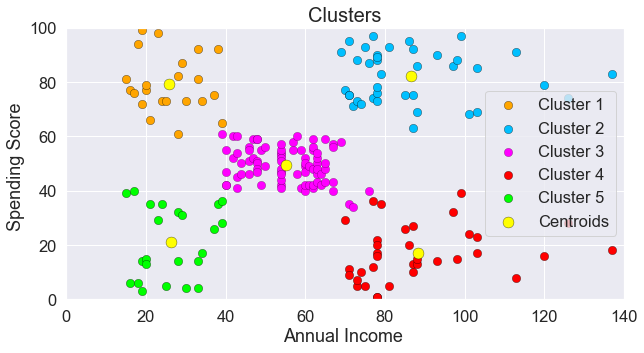

In [39]:
fig, ax = plt.subplots(figsize=(10,5)) 
plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending Score (1-100)'],
            s=70,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending Score (1-100)'],
            s=70,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending Score (1-100)'],
            s=70,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending Score (1-100)'],
            s=70,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')

plt.scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending Score (1-100)'],
            s=70,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')



plt.scatter(x=kms.cluster_centers_[:, 0], y=kms.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroids',edgecolor='black', linewidth=0.3)
plt.legend(loc='right')
plt.xlim(0,140)
plt.ylim(0,100)
plt.xlabel('Annual Income ')
plt.ylabel('Spending Score ')
plt.title('Clusters', fontsize = 20)
plt.show()

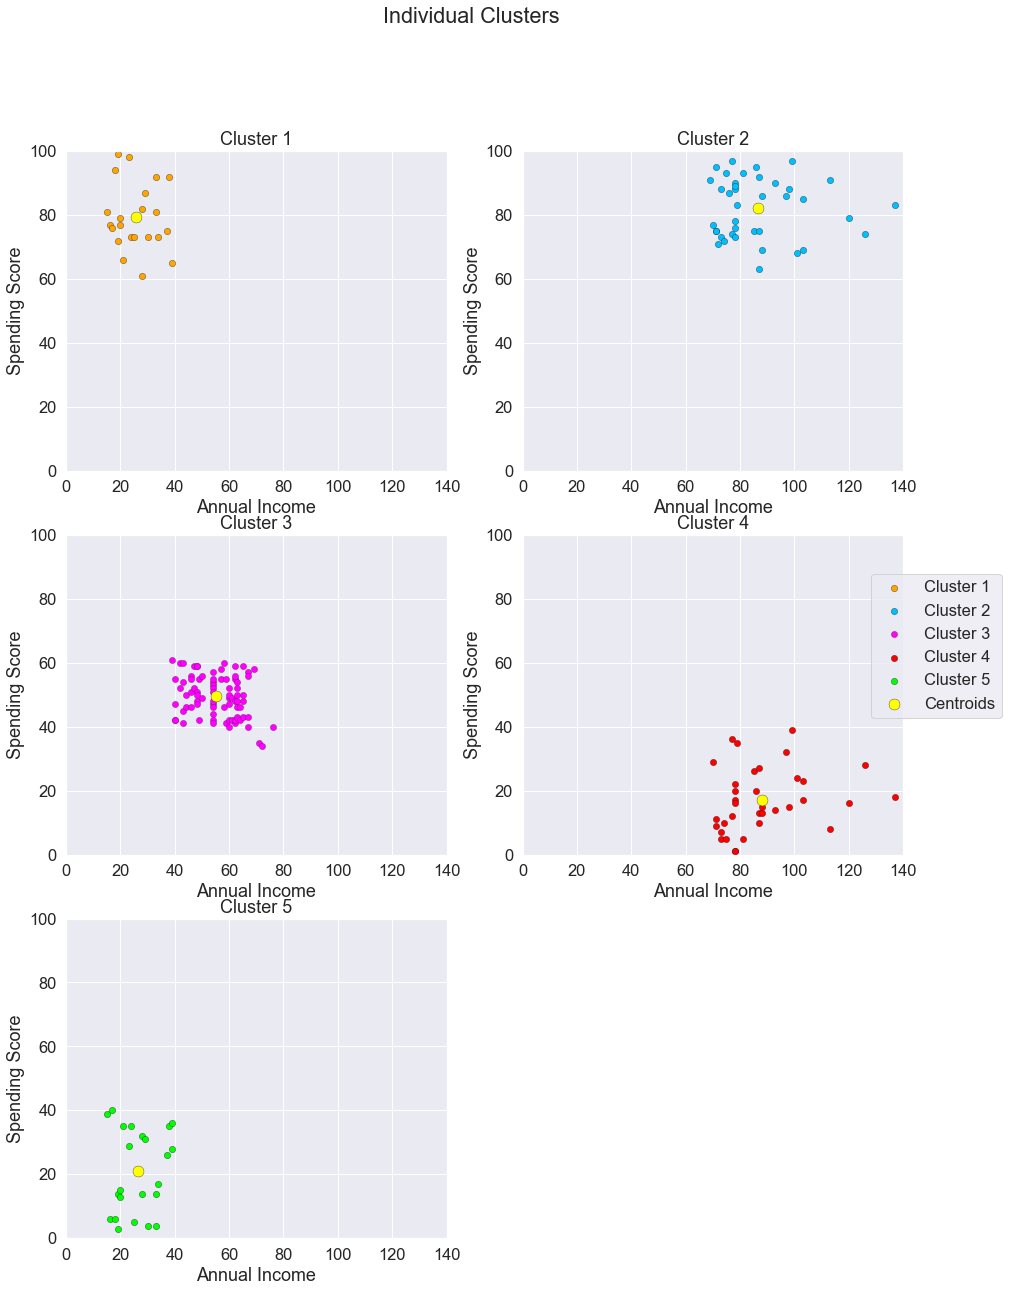

In [40]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,20))
ax[0,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 4]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 4]['Spending Score (1-100)'],
            s=40,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')
ax[0,0].scatter(x=kms.cluster_centers_[4,0], y=kms.cluster_centers_[4,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[0,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 1')

ax[0,1].scatter(x=clusters[clusters['Cluster_Prediction'] == 0]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 0]['Spending Score (1-100)'],
            s=40,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')
ax[0,1].scatter(x=kms.cluster_centers_[0,0], y=kms.cluster_centers_[0,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[0,1].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 2')

ax[1,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 2]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 2]['Spending Score (1-100)'],
            s=40,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')
ax[1,0].scatter(x=kms.cluster_centers_[2,0], y=kms.cluster_centers_[2,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[1,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 3')

ax[1,1].scatter(x=clusters[clusters['Cluster_Prediction'] == 1]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 1]['Spending Score (1-100)'],
            s=40,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')
ax[1,1].scatter(x=kms.cluster_centers_[1,0], y=kms.cluster_centers_[1,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3)
ax[1,1].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 4')

ax[2,0].scatter(x=clusters[clusters['Cluster_Prediction'] == 3]['Annual Income (k$)'],
            y=clusters[clusters['Cluster_Prediction'] == 3]['Spending Score (1-100)'],
            s=40,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')
ax[2,0].scatter(x=kms.cluster_centers_[3,0], y=kms.cluster_centers_[3,1],
                s = 120, c = 'yellow',edgecolor='black', linewidth=0.3, label='Centroids')
ax[2,0].set(xlim=(0,140), ylim=(0,100), xlabel='Annual Income', ylabel='Spending Score', title='Cluster 5')

fig.delaxes(ax[2,1])
fig.legend(loc='right')
fig.suptitle('Individual Clusters')
plt.show()

Cluster Orange - Balanced Customers :

They earn less and spend less. We can see people have low annual income and low spending scores, this is quite reasonable as people having low salaries prefer to buy less, in fact, these are the wise people who know how to spend and save money. The shops/mall will be least interested in people belonging to this cluster.

Cluster Blue - Pinch Penny Customers :

Earning high and spending less. We see that people have high income but low spending scores, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.

Cluster Purple - Normal Customer :

Customers are average in terms of earning and spending An Average consumer in terms of spending and Annual Income we see that people have average income and an average spending score, these people again will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score.

Cluster Red - Spenders :

This type of customers earns less but spends more Annual Income is less but spending high, so can also be treated as potential target customer we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. Maybe it’s because these people are more than satisfied with the mall services. The shops/malls might not target these people that effectively but still will not lose them.

Cluster Green - Target Customers :

Earning high and also spending high Target Customers. Annual Income High as well as Spending Score is high, so a target consumer. we see that people have high income and high spending scores, this is the ideal case for the mall or shops as these people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities.